# Credit Card Fraud Detection

## 📜 Project Overview
Credit card fraud is a growing concern in the financial sector. This project focuses on detecting fraudulent transactions using advanced machine learning techniques. By analyzing historical transaction data, the goal is to build a model that accurately identifies and prevents fraudulent activities while minimizing false positives.

---

## 📊 Dataset Description
The dataset comprises 100,000 transactions generated to simulate real-world credit card activity. Each entry includes the following features:

- **TransactionID**: A unique identifier for each transaction, ensuring traceability.
- **TransactionDate**: The date and time when the transaction occurred, allowing for temporal analysis.
- **Amount**: The monetary value of the transaction, which can help identify unusually large transactions that may indicate fraud.
- **MerchantID**: An identifier for the merchant involved in the transaction, useful for assessing merchant-related fraud patterns.
- **TransactionType**: Indicates whether the transaction was a purchase or a refund, providing context for the activity.
- **Location**: The geographic location of the transaction, facilitating analysis of fraud trends by region.
- **IsFraud**: A binary target variable indicating whether the transaction is fraudulent (1) or legitimate (0), essential for supervised learning models.

---

## 1. 🔄 Data Loading & Import
In this section, we will load the dataset and import the necessary libraries. This step ensures that the data is accessible and ready for preprocessing and analysis.

- **Libraries**: Pandas, NumPy
- **Actions**: Load dataset from CSV or other formats, inspect the first few rows of the data, and check data types.

---

In [1]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
file_path = '/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv'  
data = pd.read_csv(file_path)

In [3]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [5]:
data.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [6]:
data.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


## 2. 🧹 Data Cleaning & Preprocessing
Data cleaning is crucial for ensuring high-quality inputs for machine learning models. This segment will focus on handling missing values, outliers, and data transformations.

- **Actions**: 
  - Handle missing data and anomalies
  - Remove duplicates, if any
  - Convert categorical features into numerical format (e.g., using label encoding or one-hot encoding)

---

In [7]:
data = data.drop_duplicates()

In [8]:
label_encoder_type = LabelEncoder()
label_encoder_location = LabelEncoder()

data['TransactionType'] = label_encoder_type.fit_transform(data['TransactionType'])
data['Location'] = label_encoder_location.fit_transform(data['Location'])

transaction_type_mapping = dict(zip(label_encoder_type.classes_, range(len(label_encoder_type.classes_))))
location_mapping = dict(zip(label_encoder_location.classes_, range(len(label_encoder_location.classes_))))

transaction_type_inverse_mapping = {v: k for k, v in transaction_type_mapping.items()}
location_inverse_mapping = {v: k for k, v in location_mapping.items()}

In [9]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day 
data['TransactionMonth'] = data['TransactionDate'].dt.month 

data = data.drop(columns=['TransactionDate'])

In [10]:
data.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
0,1,4189.27,688,1,7,0,14,3,4
1,2,2659.71,109,1,1,0,13,19,3
2,3,784.00,394,0,4,0,10,8,1
3,4,3514.40,944,0,5,0,23,13,4
4,5,369.07,475,0,6,0,18,12,7



## 3. 🔍 Exploratory Data Analysis (EDA)
In this step, we will explore the dataset to uncover patterns and trends that can inform model building.

- **Actions**:
  - Visualize the distribution of features
  - Investigate class balance (fraud vs. legitimate transactions)
  - Identify correlations between features
  - Perform outlier analysis, especially for transaction amounts

---

In [11]:
data.describe()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.501310,4.485300,0.010000,11.50084,15.782220,6.516240
std,28867.657797,1442.415999,288.715868,0.500001,2.876283,0.099499,6.91768,8.813795,3.448248
min,1.000000,1.050000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,25000.750000,1247.955000,252.000000,0.000000,2.000000,0.000000,6.00000,8.000000,4.000000
50%,50000.500000,2496.500000,503.000000,1.000000,4.000000,0.000000,12.00000,16.000000,7.000000
75%,75000.250000,3743.592500,753.000000,1.000000,7.000000,0.000000,17.00000,23.000000,10.000000
max,100000.000000,4999.770000,1000.000000,1.000000,9.000000,1.000000,23.00000,31.000000,12.000000


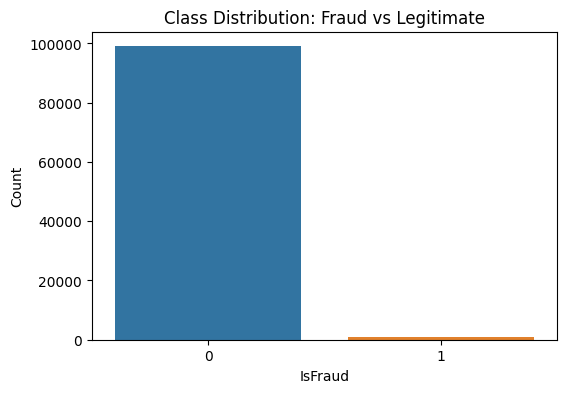

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=data)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

here is the plot showing the class distribtion of the label that need to be predicted, the non fraud has 99,000 rows of data while the fraud data only 1,000 this might be a challenge for modelling because of the imbalance of the dataset, but this shows that a fraud is a case that happens very rarely.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


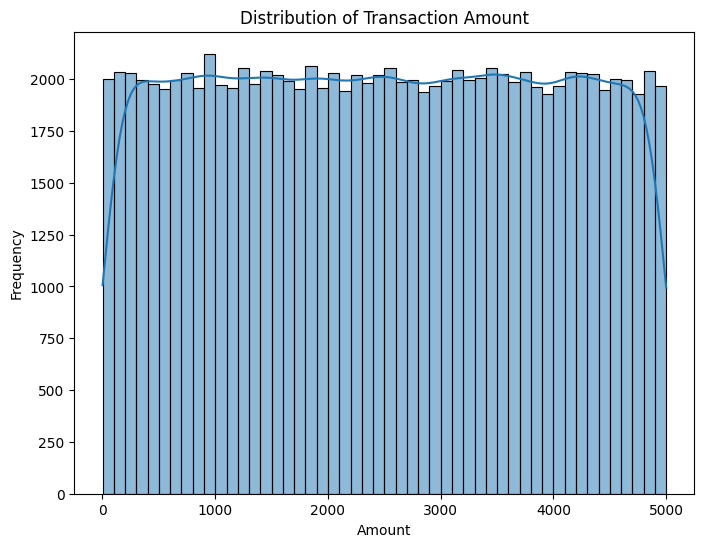

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

here shows the transaction amount distribution, the plot shows almost equal distribution of each amount of each trasaction by 2000. 

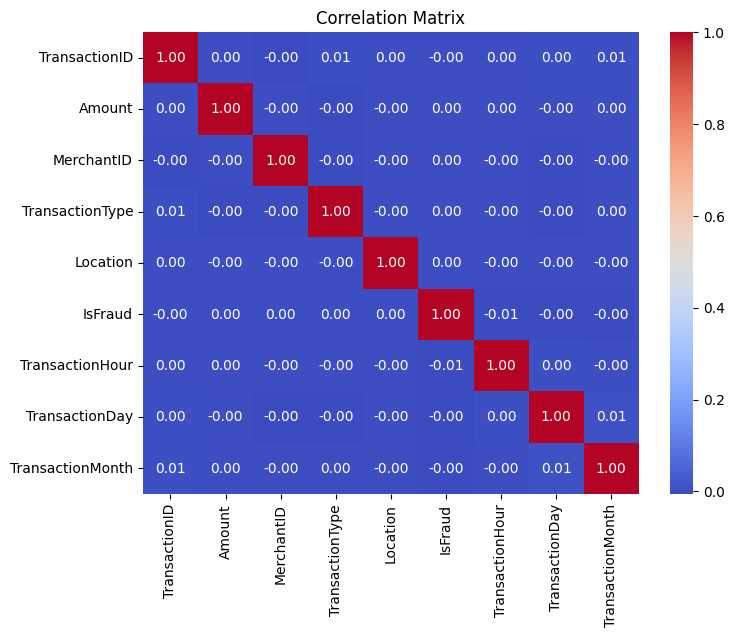

In [14]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

while the correlation plot shows there is no strong or weak correlation between all of the data to eachother, this is also a problem that could be something to handle in modelling later. 

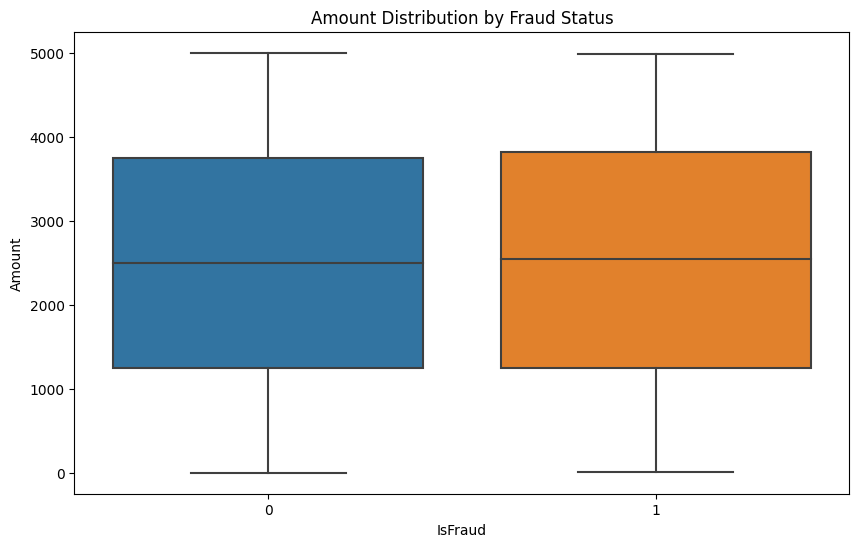

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

The box plot of transaction amounts by fraud status reveals how the distribution of transaction amounts differs between fraudulent and non-fraudulent transactions. By comparing the medians, we can observe the central tendency of each group, while the box shows the spread of amounts within the interquartile range (IQR). The whiskers indicate the range of values, and any outliers highlight unusually high or low transactions.

but here shows it is equal in terms of max min and the median, this is another challenge, that could show fraud might occurs in any amount.

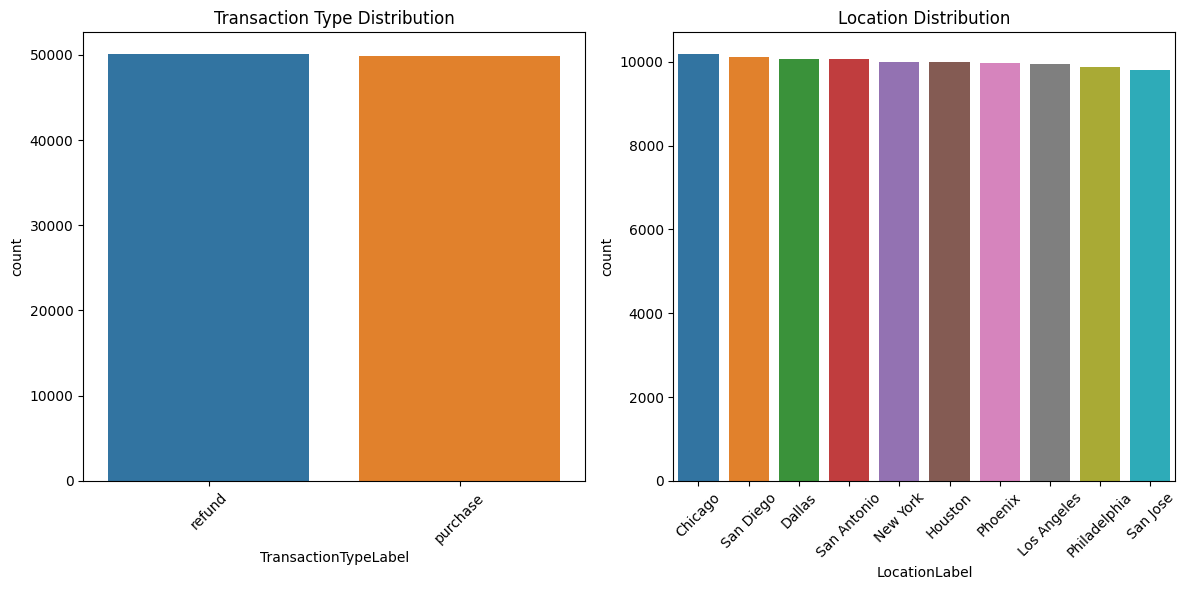

In [38]:
data['TransactionTypeLabel'] = data['TransactionType'].map(transaction_type_inverse_mapping)
data['LocationLabel'] = data['Location'].map(location_inverse_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionTypeLabel', data=data, order=data['TransactionTypeLabel'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45) 

plt.subplot(1, 2, 2)
sns.countplot(x='LocationLabel', data=data, order=data['LocationLabel'].value_counts().index)
plt.title('Location Distribution')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

this two plot shows fraud could appear in both transaction type, either it is refund of purchase, the location also shows that chicago have the most fraud.

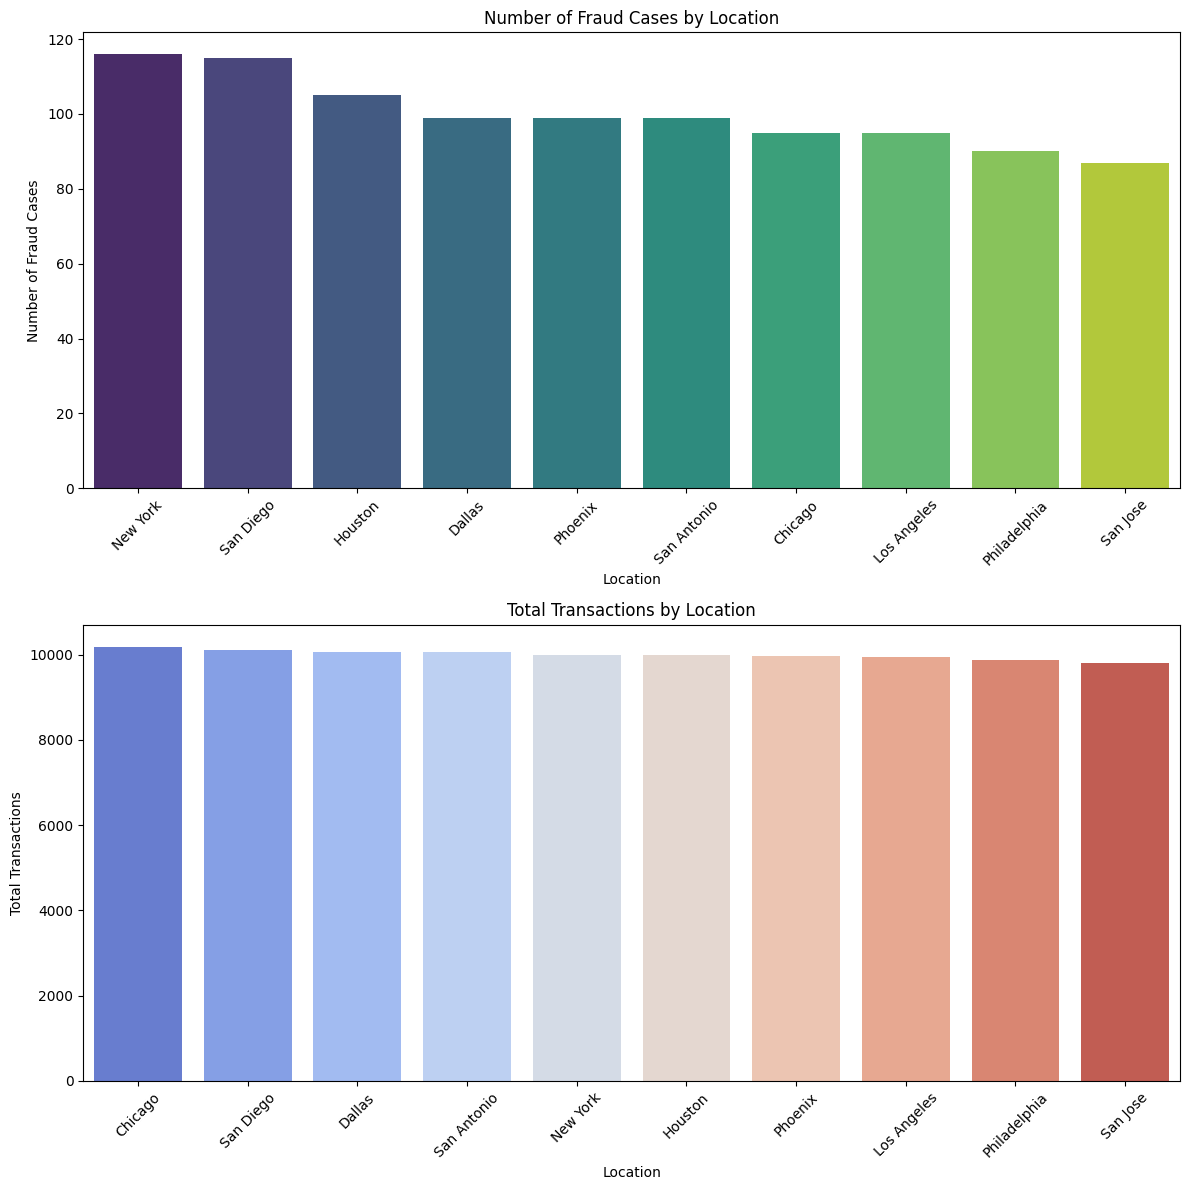

In [17]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

fraud_by_location = data[data['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')

fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)

total_transactions_by_location = data.groupby('LocationLabel').size().reset_index(name='TotalTransactions')

total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Amount', ylabel='TransactionHour'>

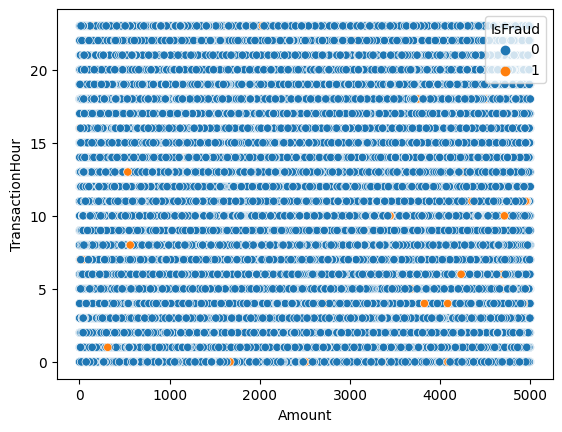

In [18]:
sns.scatterplot(x='Amount', y='TransactionHour', hue='IsFraud', data=data)

this scatterplot shows that every hours can be a time for fraud, with different kind of amount, but we can try to say that the pattern here is, the lower amount often to happen at 1,7,13. then the rest are large amount

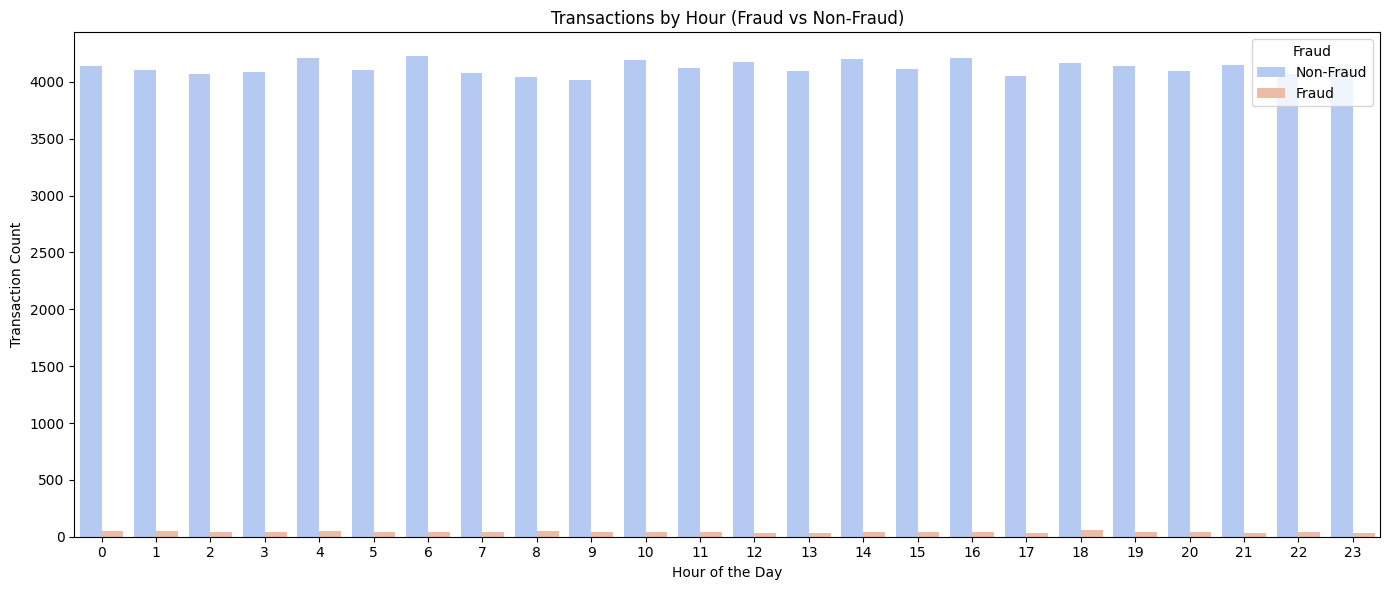

In [19]:
plt.figure(figsize=(14, 6))

sns.countplot(x='TransactionHour', hue='IsFraud', data=data, palette='coolwarm')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

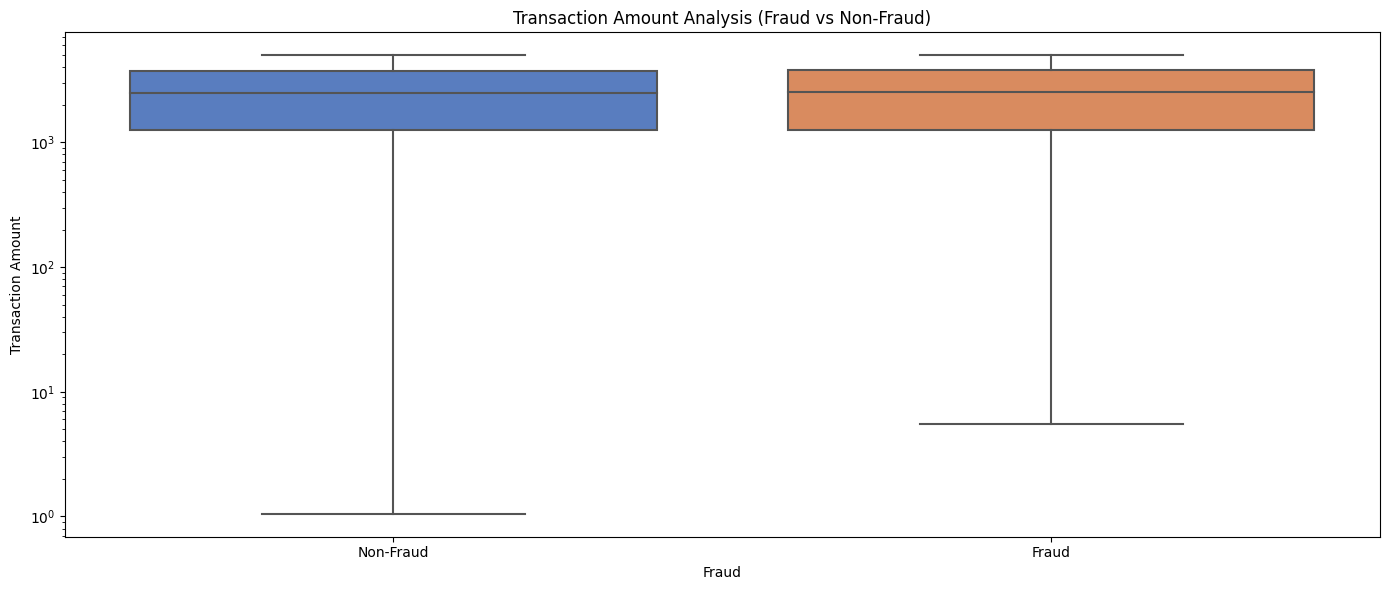

In [20]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')
plt.title('Transaction Amount Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.yscale('log')  
plt.tight_layout()
plt.show()

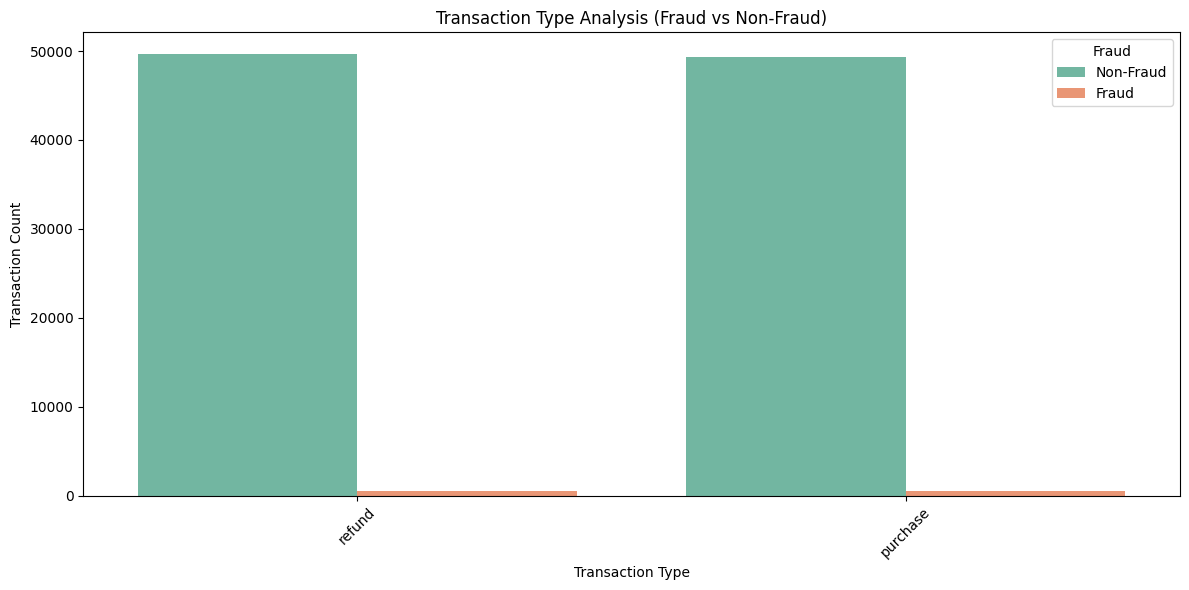

In [21]:
plt.figure(figsize=(12, 6))

sns.countplot(x='TransactionTypeLabel', hue='IsFraud', data=data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

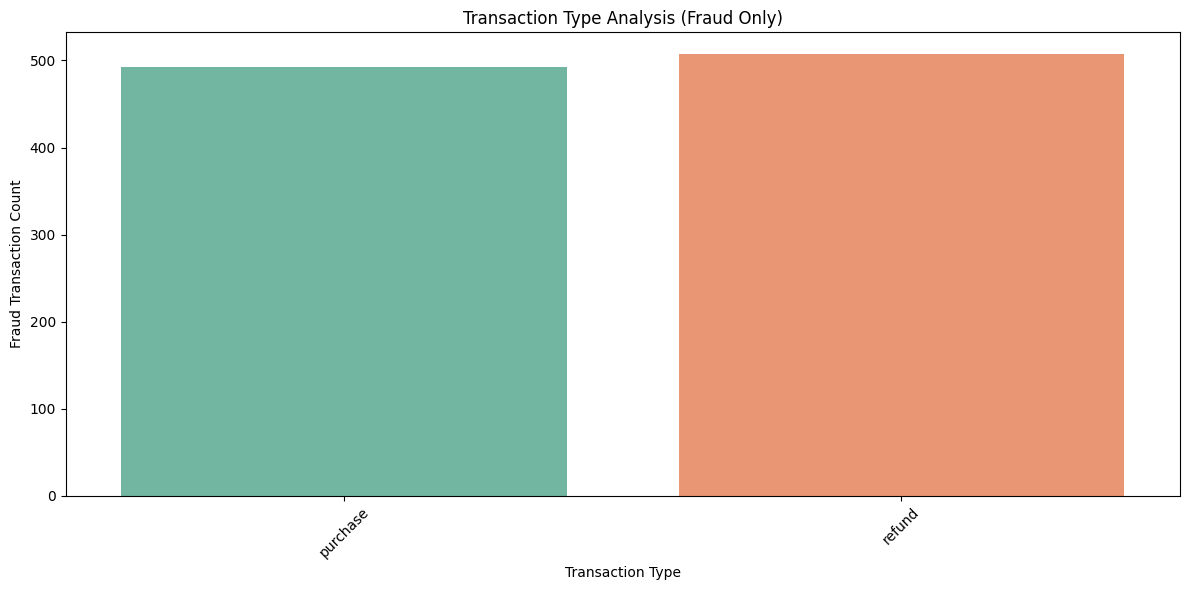

In [22]:
plt.figure(figsize=(12, 6))

fraud_data = data[data['IsFraud'] == 1]

sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud Only)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Transaction Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

the main challenge of this dataset is how to find the pattern of fraud that occurs from the very imbalance dataset. 


## 4. 🔬 Model Building
This section focuses on training machine learning models to detect fraud. Different algorithms will be explored and compared to identify the best-performing model.

- **Models to Try**:
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - XGBoost

---

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [24]:
data_model = data.drop(columns=['TransactionID', 'TransactionTypeLabel', 'LocationLabel', 'MerchantID'])

X = data_model.drop(columns=['IsFraud'])
y = data_model['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    models[model_name] = model  


## 5. 🧪 Model Evaluation
Evaluate model performance using appropriate metrics and cross-validation. This step will determine how well the model generalizes to unseen data.

- **Metrics**:
  - Accuracy
  - Precision, Recall, and F1-Score
  - Confusion Matrix
  - ROC Curve and AUC
  - Precision-Recall Curve

---

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Accuracy: 0.99

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



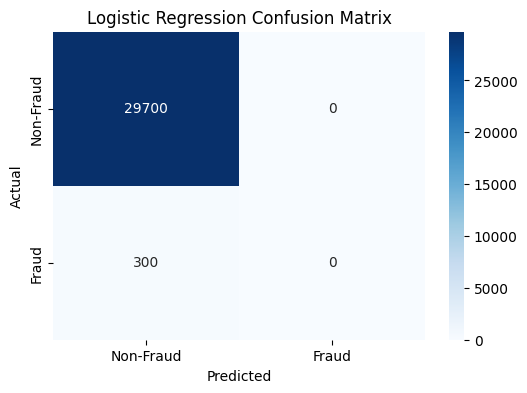


Decision Tree Accuracy: 0.9764

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29700
           1       0.00      0.01      0.01       300

    accuracy                           0.98     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.98      0.98     30000



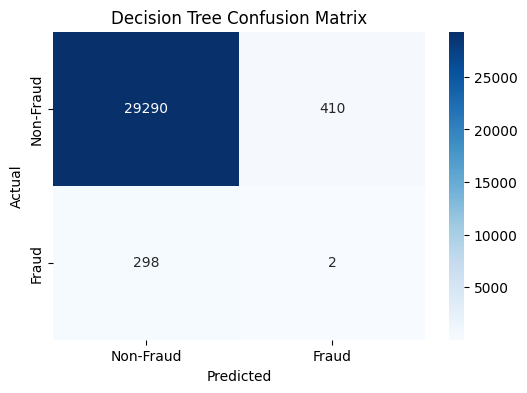

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Accuracy: 0.99

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



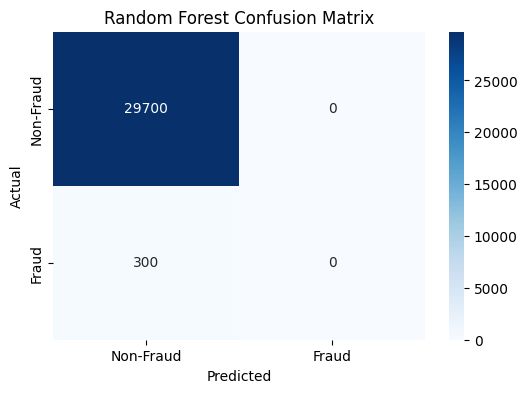


XGBoost Accuracy: 0.9899333333333333

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000



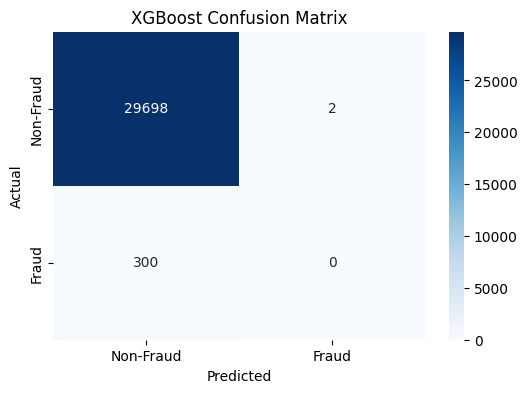

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## 6. 🔧 Model Optimization & Tuning
After evaluating the models, we will optimize the best-performing model to improve its predictive power.

- **Actions**:
  - experiments with SMOTE

---

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [29]:
data = data.drop(['TransactionID', 'TransactionTypeLabel', 'LocationLabel'], axis=1)

In [30]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [32]:
# Print the count before SMOTE
print("Before SMOTE:")
print(f"Train Data - Positive class (Fraud): {y_train.sum()} | Negative class (Non-Fraud): {(y_train == 0).sum()}")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")

Before SMOTE:
Train Data - Positive class (Fraud): 787 | Negative class (Non-Fraud): 79213
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787


In [33]:
# Print the count after SMOTE
print("\nAfter SMOTE (Training Data):")
print(f"Train Data - Positive class (Fraud): {y_train_res.sum()} | Negative class (Non-Fraud): {(y_train_res == 0).sum()}")
print(f"Train Data Shape: {X_train_res.shape}")

print("\nTest Data (No Change):")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")
print(f"Test Data Shape: {X_test.shape}")


After SMOTE (Training Data):
Train Data - Positive class (Fraud): 79213 | Negative class (Non-Fraud): 79213
Train Data Shape: (158426, 7)

Test Data (No Change):
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787
Test Data Shape: (20000, 7)


In [34]:
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    models[model_name] = model  


Logistic Regression Accuracy: 0.52045

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     19787
           1       0.01      0.46      0.02       213

    accuracy                           0.52     20000
   macro avg       0.50      0.49      0.35     20000
weighted avg       0.98      0.52      0.68     20000



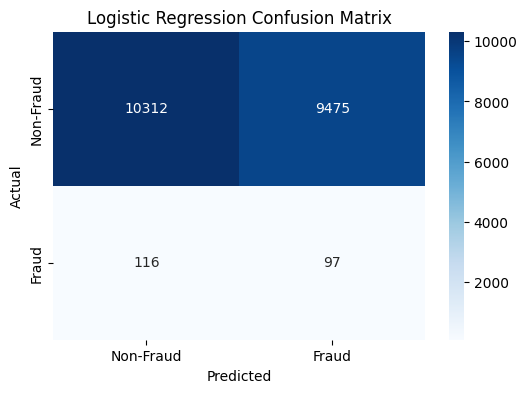


Decision Tree Accuracy: 0.92025

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     19787
           1       0.01      0.06      0.02       213

    accuracy                           0.92     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.92      0.95     20000



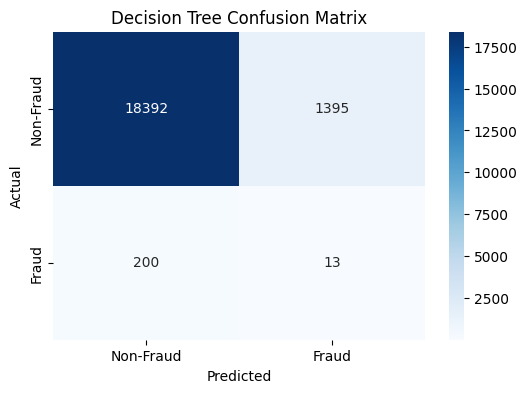


Random Forest Accuracy: 0.95345

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.95      0.97     20000



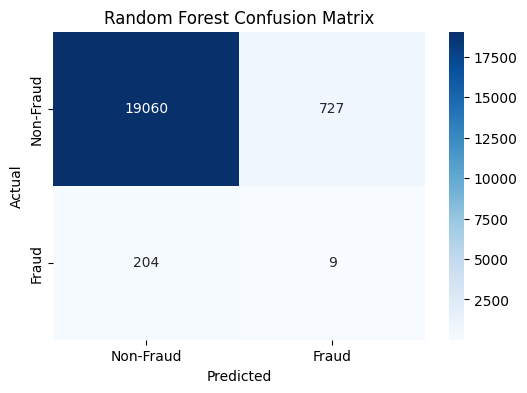


XGBoost Accuracy: 0.83595

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     19787
           1       0.01      0.15      0.02       213

    accuracy                           0.84     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.98      0.84      0.90     20000



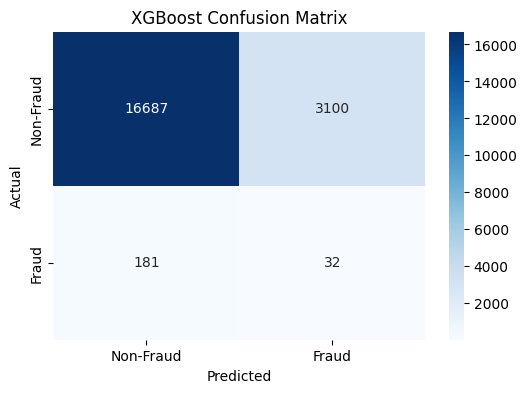

In [35]:
# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Hyperparams tuning for Random Forest with SMOTE


In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Define the reduced parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether to use bootstrap samples for building trees
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 5 iterations and 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the resampled data
random_search.fit(X_train_res, y_train_res)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.9685595071673939


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.9685595071673939
Accuracy: 0.94875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.95      0.96     20000



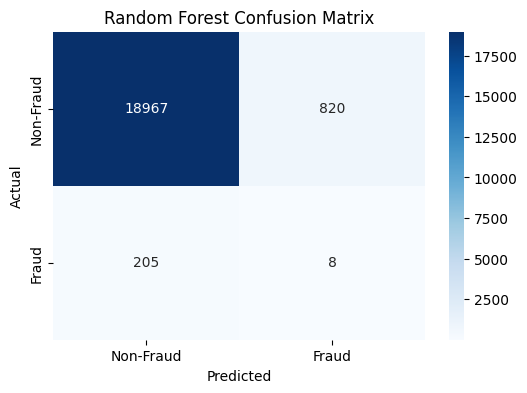

In [37]:
# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{clf_report}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()